In [2]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

# Non-Linear Decision Boundary

In [3]:
X, y = make_circles(n_samples=10, factor=0.5)
print(X)
print(y)

[[ 0.1545085  -0.47552826]
 [ 0.30901699 -0.95105652]
 [ 1.          0.        ]
 [-0.80901699 -0.58778525]
 [-0.80901699  0.58778525]
 [ 0.5         0.        ]
 [-0.4045085  -0.29389263]
 [ 0.1545085   0.47552826]
 [ 0.30901699  0.95105652]
 [-0.4045085   0.29389263]]
[1 0 0 0 0 1 1 1 0 1]


# SAMPLE 1

In [66]:
X, y = make_circles(n_samples=1000, factor=0.4)

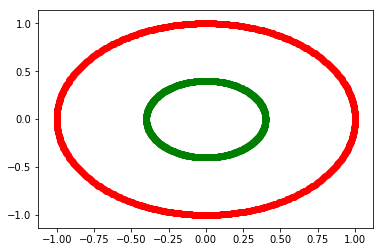

In [67]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], c='r')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], c='g')
plt.show()

In [45]:
split = int(0.6*X.shape[0])
X_train = X[:split, :]
X_test = X[split:, :]

Y_train = y[:split]
Y_test = y[split:]

print(X_train.shape)
print(Y_train.shape)

(600, 2)
(600,)


### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression()
ls.fit(X_train, Y_train)
print(ls.score(X_test, Y_test) * 100)

47.5


### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train) 
print(knn.score(X_test, Y_test) * 100)

100.0


### Neural Network (Multi Layer Perceptron)

In [65]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, 
                    hidden_layer_sizes=(6), 
                    random_state=100, 
                    activation='logistic', 
                    max_iter=200)
mlp.fit(X_train, Y_train)
print(mlp.score(X_test, Y_test) * 100)

100.0


# SAMPLE 2

In [43]:
X, y = make_circles(n_samples=1000, factor=0.9)

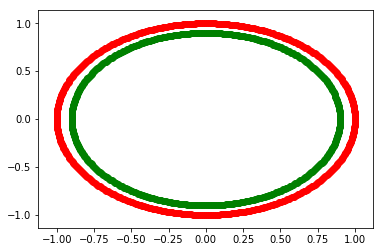

In [44]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], c='r')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], c='g')
plt.show()

In [45]:
split = int(0.6*X.shape[0])
X_train = X[:split, :]
X_test = X[split:, :]

Y_train = y[:split]
Y_test = y[split:]

print(X_train.shape)
print(Y_train.shape)

(600, 2)
(600,)


### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression()
ls.fit(X_train, Y_train)
print(ls.score(X_test, Y_test) * 100)

47.5


### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train) 
print(knn.score(X_test, Y_test) * 100)

100.0


### Neural Network (Multi Layer Perceptron)

In [65]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, 
                    hidden_layer_sizes=(6), 
                    random_state=100, 
                    activation='logistic', 
                    max_iter=200)
mlp.fit(X_train, Y_train)
print(mlp.score(X_test, Y_test) * 100)

100.0


# SAMPLE 3

In [139]:
X, y = make_circles(n_samples=100, factor=0.9)

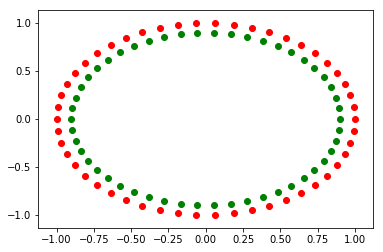

In [140]:
for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], c='r')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], c='g')
plt.show()

In [141]:
split = int(0.6*X.shape[0])
X_train = X[:split, :]
X_test = X[split:, :]

Y_train = y[:split]
Y_test = y[split:]

print(X_train.shape)
print(Y_train.shape)

(60, 2)
(60,)


### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression()
ls.fit(X_train, Y_train)
print(ls.score(X_test, Y_test) * 100)

45.0


### KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train) 
print(knn.score(X_test, Y_test) * 100)

45.0


### Neural Network (Multi Layer Perceptron)

Accuracy 95.0


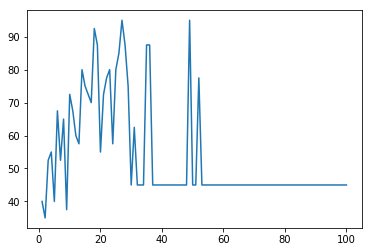

In [174]:
from sklearn.neural_network import MLPClassifier

sample = []
accuracy = []
max_accuracy = 0

for i in range(1, 101):
    mlp = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(i), 
                        random_state=100, 
                        activation='logistic', 
                        max_iter=200)
    mlp.fit(X_train, Y_train)
    acc = mlp.score(X_test, Y_test) * 100
    max_accuracy = max(max_accuracy, acc)
    sample.append(i)
    accuracy.append(acc)

print('Max Accuracy', max_accuracy)
plt.plot(sample, accuracy)
plt.show()

#### Scratch Work (Ignore)

In [70]:
W = ls.coef_
print(W)
W = W[0]
print(W)

b = ls.intercept_
b = b[0]
print(b)

def hypothesis(x1, x2, b=b, W=W):
    return b + W[0]*x1 + W[1]*x2
    
    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

[[0.00954587 0.0044632 ]]
[0.00954587 0.0044632 ]
-0.05967975495064713


In [72]:
xval1 = np.arange(-1, 1, 0.1)
xval2 = np.arange(-1, 1, 0.1)

val1 = []
val2 = []

for x1 in xval1:
    for x2 in xval2:
        h = hypothesis(x1, x2)
        s = sigmoid(h)
        if s >= 0.5:
            val1.append([x1, x2])
        else:
            val2.append([x1, x2])
        

val1 = np.array(val1)
val2 = np.array(val2)
        
plt.plot(val1[:,0], val1[:,1], 'y.')
plt.plot(val2[:,0], val2[:,1], 'b.')



for ix in range(X.shape[0]):
    if y[ix] == 0:
        plt.scatter(X[ix, 0], X[ix, 1], c='r')
    else:
        plt.scatter(X[ix, 0], X[ix, 1], c='g')


plt.show()

IndexError: too many indices for array

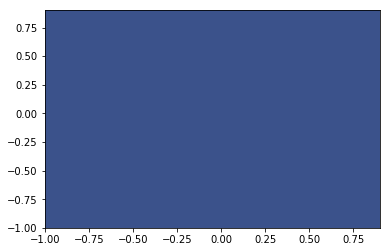

In [73]:
uv = np.arange(-1, 1, 0.1)
xv, yv = np.meshgrid(uv, uv)

h = np.vectorize(hypothesis)(xv, yv).flatten()
s = np.vectorize(sigmoid)(h)

z = [(1 if i > 0.5 else 0) for i in s]
z = np.asarray(z).reshape(20, 20)
        
plt.contourf(xv, yv, z)

# for ix in range(X.shape[0]):
#     if y[ix] == 0:
#         plt.scatter(X[ix, 0], X[ix, 1], c='r')
#     else:
#         plt.scatter(X[ix, 0], X[ix, 1], c='g')

plt.show()